Author: Daniel Abadjiev   
Date: December 5, 2025  
Description: Notebook to test out what is going on with tracklists p, and pt

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
import sys
sys.path.append("/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/daniel/validationPlots/")
from plotUtils import *
import pickle

In [13]:
trackDirBib_mm = '/local/d1/smartpixML/reGenBIB/produceSmartPixMuC/Tracklists0730_mm/BIB_tracklists/'


In [14]:
tracksBib_mm = loadTrackData(trackDirBib_mm)
truthDF = pd.read_pickle("dfOfTruth.pkl")
truthBib_mm = truthDF.query("source == 'bib_mm'")

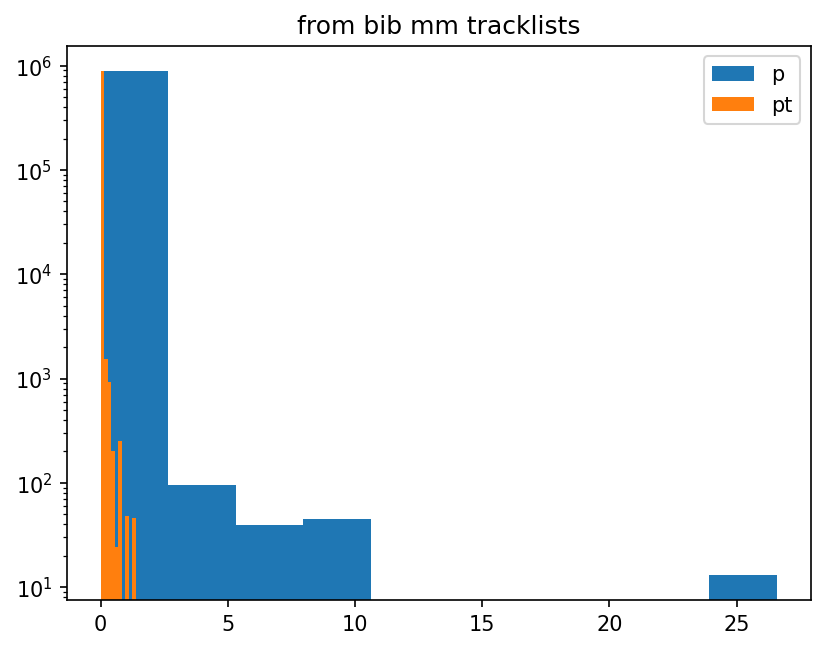

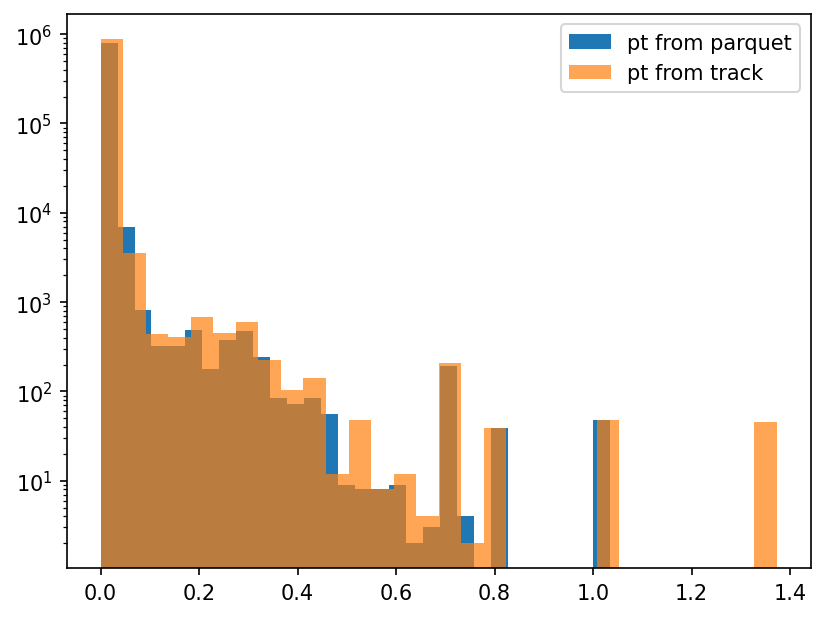

In [19]:

# tracks1 = 
plt.hist(tracksBib_mm["p"],label="p")
plt.hist(tracksBib_mm["pt"], label="pt")
plt.title("from bib mm tracklists")
plt.legend()
plt.yscale('log')
plt.show()
plt.hist(truthBib_mm["pt"],bins=30,label="pt from parquet")
plt.hist(tracksBib_mm["pt"],bins=30,label="pt from track",alpha=0.7)
plt.legend()
plt.yscale('log')

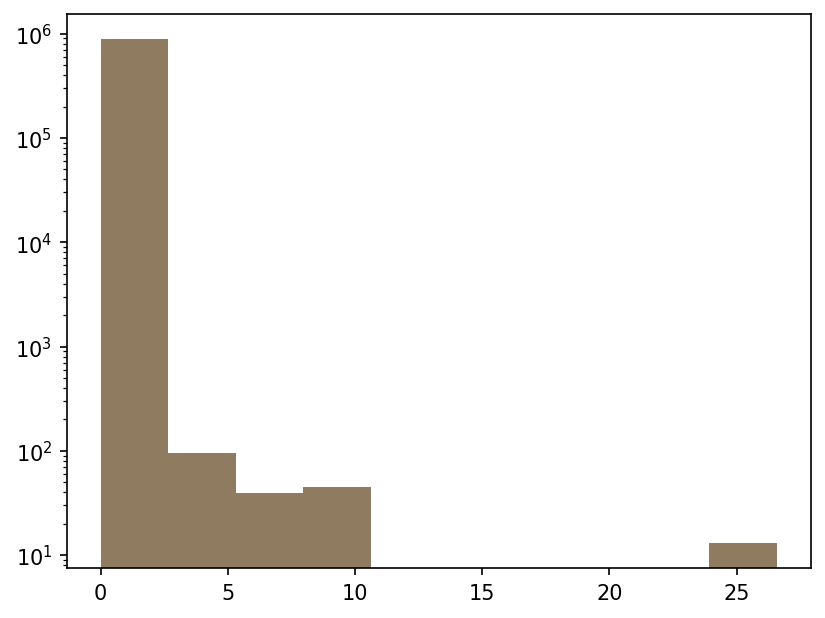

In [25]:
z = 1./np.sqrt((1.+tracksBib_mm["cotb"]*tracksBib_mm["cotb"]+tracksBib_mm["cota"]*tracksBib_mm["cota"]))
x = z*tracksBib_mm["cota"]
y = z*tracksBib_mm["cotb"]
qq = x**2 +y**2 +z**2 

p = tracksBib_mm["pt"] / np.sqrt((z**2 +y**2)/(x**2 +y**2 +z**2 ))
plt.hist(p,label="p recalculated based on cota, cotb, pt, in the tracklists")
plt.hist(p,label="p directly as saved in tracklists",alpha = 0.5)
plt.yscale('log')